# Generate Room Reliability Brainmaps

Visualize how room reliability is spread across the brain.

# import

In [1]:
from tqdm import tqdm_notebook
import numpy as np
import deepdish as dd
import os
import h5py
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# from _classification_util import *
from _mempal_util import nSubj, nItems, create_dirs, save_obj
from _searchlight_util import *

In [2]:
def ExtractRoom2RoomResults(roi,roi_ids,hems=['L','R'], measures=['reliability'], reliability_dir = '../PythonData2024/Output/room2room'):
    
#     nPerm =1000
    
    # measures = 'reliability' # 'distinctiveness' , 'stability'
#     reliability_dir = '../PythonData2024/Output/room2room' #should be RoomReliability    
    vals = {}
   
    ## grab one of these: (dict_keys(['corrmat', 'distinctiveness', 'reliability', 'reliability_loo_isc', 'room2room', 'stability']))
    for measure in measures:
        vals[measure] = {}
        
        for hem in hems:
            vals[measure][hem] = {}

            if measure == 'corrmat':
                vals[measure][hem] = np.full((len(roi_ids),nItems,nItems,nSubj), fill_value=np.nan)
                
            if measure == 'reliability' or measure =='distinctiveness' or measure == 'stability':
                vals[measure][hem] = np.full((len(roi_ids),nItems,nSubj,nPerm+1), fill_value=np.nan)
                
            if measure == 'diffs': #it's the same as "reliablity", but with "items/rooms" already averaged
                vals[measure][hem] = np.full((len(roi_ids),nSubj), fill_value=np.nan)

            for i,roi_id in enumerate(tqdm_notebook(roi_ids)):
                fname = '{}_{}{:03d}_{}_RoomReliability.h5'.format(date,roi,roi_id,hem)

                if measure == 'diffs':
                    vals[measure][hem][i,:] = dd.io.load(os.path.join(reliability_dir,fname),group='/{}/{}'.format('room2room',measure))

                else:
                    vals[measure][hem][i] = dd.io.load(os.path.join(reliability_dir,fname),group='/{}'.format(measure))

                
    return vals
                
    

In [3]:
# measures include: 'corrmat', 'distinctiveness', 'reliability', 'reliability_loo_isc', 'room2room', 'stability'

# vals['corrmat'].shape,vals['reliability'].shape,vals['room2room'].keys(),vals['room2room']['diffs'].shape,vals['room2room']['t'].shape
# ((23, 23, 25), (23, 25, 1001), dict_keys(['diffs', 'p', 't']), (25,), ())

In [4]:
reliability_dir = '../PythonData2024/Output/room2room' #should be RoomReliability




In [4]:
roi = 'phippo'
roi_ids = [9999] #np.arange(1483)
hem = 'None'
date = 20240108
nPerm = 1000
# scores = ExtractRoom2RoomResults(roi,roi_ids, measures=['reliability','corrmat','diffs'])
scores = ExtractRoom2RoomResults(roi,roi_ids, [hem], measures=['diffs', "reliability"], reliability_dir=reliability_dir
                                
                                )

/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
scores['diffs']['None'].shape, scores['reliability']['None'].shape

((1, 25), (1, 23, 25, 1001))

In [15]:
np.nanmean(scores['reliability']['None'][0,:,:,0],0)

array([ 0.02005307,  0.02359182,  0.00256627, -0.01408308,  0.02815335,
        0.00138644,  0.00973971,  0.04331642, -0.01281255,  0.01005949,
       -0.00538573,  0.01144078,  0.00678937, -0.01622022,  0.00722258,
        0.00413338, -0.00443391,  0.00837466,  0.01853976, -0.01862684,
       -0.00505658,  0.02204691,  0.01342825, -0.00067259,  0.00620698])

In [16]:
scores['diffs']['None'][0,:]

array([ 0.02005307,  0.02359182,  0.00256627, -0.01408308,  0.02815335,
        0.00138644,  0.00973971,  0.04331642, -0.01281255,  0.01005949,
       -0.00538573,  0.01144078,  0.00678937, -0.01622022,  0.00722258,
        0.00413338, -0.00443391,  0.00837466,  0.01853976, -0.01862684,
       -0.00505658,  0.02204691,  0.01342825, -0.00067259,  0.00620698])

In [22]:
ls ../PythonData2024/Output/room2room/

20240108_ahippo9999_None_RoomReliability.h5
20240108_hippo9999_None_RoomReliability.h5
20240108_phippo9999_None_RoomReliability.h5
20240108_SL000_R_RoomReliability.h5
20240108_SL001_R_RoomReliability.h5
20240108_SL002_R_RoomReliability.h5
20240108_SL003_R_RoomReliability.h5
20240108_SL004_R_RoomReliability.h5
20240108_SL005_R_RoomReliability.h5
20240108_SL006_R_RoomReliability.h5
20240108_SL007_R_RoomReliability.h5
20240108_SL008_R_RoomReliability.h5
20240108_SL009_R_RoomReliability.h5
20240108_SL010_R_RoomReliability.h5
20240108_SL011_R_RoomReliability.h5
20240108_SL012_R_RoomReliability.h5
20240108_SL013_R_RoomReliability.h5
20240108_SL014_R_RoomReliability.h5
20240108_SL015_R_RoomReliability.h5
20240108_SL016_R_RoomReliability.h5
20240108_SL017_R_RoomReliability.h5
20240108_SL018_R_RoomReliability.h5
20240108_SL019_R_RoomReliability.h5
20240108_SL020_R_RoomReliability.h5
20240108_SL021_R_RoomReliability.h5
20240108_SL022_R_RoomReliability.h5
20240108_SL023_R_RoomReliability.h5
20240

20240108_SL550_R_RoomReliability.h5
20240108_SL551_R_RoomReliability.h5
20240108_SL552_R_RoomReliability.h5
20240108_SL553_R_RoomReliability.h5
20240108_SL554_R_RoomReliability.h5
20240108_SL555_R_RoomReliability.h5
20240108_SL556_R_RoomReliability.h5
20240108_SL557_R_RoomReliability.h5
20240108_SL558_R_RoomReliability.h5
20240108_SL559_R_RoomReliability.h5
20240108_SL560_R_RoomReliability.h5
20240108_SL561_R_RoomReliability.h5
20240108_SL562_R_RoomReliability.h5
20240108_SL563_R_RoomReliability.h5
20240108_SL564_R_RoomReliability.h5
20240108_SL565_R_RoomReliability.h5
20240108_SL566_R_RoomReliability.h5
20240108_SL567_R_RoomReliability.h5
20240108_SL568_R_RoomReliability.h5
20240108_SL569_R_RoomReliability.h5
20240108_SL570_R_RoomReliability.h5
20240108_SL571_R_RoomReliability.h5
20240108_SL572_R_RoomReliability.h5
20240108_SL573_R_RoomReliability.h5
20240108_SL574_R_RoomReliability.h5
20240108_SL575_R_RoomReliability.h5
20240108_SL576_R_RoomReliability.h5
20240108_SL577_R_RoomReliabi

In [6]:
### EXTRACT ROOM RELIABILITY

roi = 'SL'
roi_ids = np.arange(1483)
date = 20240108 #20230802


nPerm = 1000
# scores = ExtractRoom2RoomResults(roi,roi_ids, measures=['reliability','corrmat','diffs'])
scores = ExtractRoom2RoomResults(roi,roi_ids, measures=['diffs', "reliability"],reliability_dir=reliability_dir)

In [7]:
 ls -lt /jukebox/norman/rmasis/MemPal/analysis/MemPal2024/PythonData2024/Logs/room2room/ | head -n4

total 460688
-rw-rw-r--. 1 rmasis normanlab 1692 Sep 17 18:26 slurm_-179167.log
-rw-rw-r--. 1 rmasis normanlab 1692 Sep 17 18:26 slurm_-179171.log
-rw-rw-r--. 1 rmasis normanlab 1692 Sep 17 18:26 slurm_-179178.log
ls: write error: Broken pipe


In [10]:
### VISUALIZE ROOM RELIABILITY ON THE SURFACE

results = {}

measure_list = ['diffs', "realiability"]

# ['room2room', 'room2object', 'isc_rooms', 'isc_objects']
for measuretype in tqdm_notebook(measure_list):
    results[measuretype] = {}
    print('...MEASURETYPE: {} ....', measuretype)
    
    ###############
    ######## START WITH THE CORRMAT ANALYSES
    ###############
    
    ###
    ## PERFORM STATS
    ###

    ## if room2room or room2object, we are dealing with t-values
    if 'diffs' == measuretype:
#         if '2' in measuretype and value == 'values':
#         print('....... diffs', measuretype,value)

        dd_hem = scores[measuretype] #shape (nSLs, nSubj)
        dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False) # (nv,nSubj)

        ## t-test
        raw_vox = {'L':np.full((nv),fill_value=np.nan),'R':np.full((nv),fill_value=np.nan)}
        t_vox = {'L':np.full((nv),fill_value=np.nan),'R':np.full((nv),fill_value=np.nan)}
        t_p_vox = {'L':np.full((nv),fill_value=np.nan),'R':np.full((nv),fill_value=np.nan)}
        for hem in ['L','R']:
            for v in range(nv):
                raw_vox[hem][v] = dd_vox[hem][v].mean() #average differnece value
                t,p = stats.ttest_1samp(dd_vox[hem][v],0)
                t_vox[hem][v] = t
                t_p_vox[hem][v] = p


        results[measuretype]['raw'] = raw_vox.copy()
        results[measuretype]['t'] = t_vox.copy()
        results[measuretype]['p'] = t_p_vox.copy()
        results[measuretype]['q'] = FDR_p_hem(t_p_vox)
        
        
print('complete')

/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/2 [00:00<?, ?it/s]

...MEASURETYPE: {} .... diffs
...MEASURETYPE: {} .... realiability
complete


In [23]:

### DATA
data = results
# data = measures['room2room']['benefits_bySubj_group']

brainmap_dir = '../PythonData2024/Output/brainmaps/' ; create_dirs(brainmap_dir)

save_obj('../PythonData2024/Output/brainmaps/{}_Reliability.pkl'.format(date),data)

print("complete")

# print('../../PythonData/MemPal2021/output/brainmaps/{}_SL_room2room_cp.pkl'.format(date))


Folder already exists: ../PythonData2024/Output/brainmaps/
complete


# plot r2r

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from _mempal_util import RoomObjectIdxToNames

In [8]:
SL_right = [985] # near ipoj

### EXTRACT ROOM RELIABILITY

roi = 'SL'
roi_ids = SL_right
date = 20240108 #20230802
nPerm = 1000
# scores = ExtractRoom2RoomResults(roi,roi_ids, measures=['reliability','corrmat','diffs'])
scores = ExtractRoom2RoomResults(roi,roi_ids, measures=['corrmat','diffs', 'reliability'])#'diffs', "reliability"])

/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

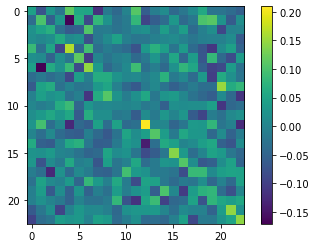

In [9]:
cmat_good = np.nanmean(scores['corrmat']['R'].squeeze()[:,:,:],2)
plt.imshow(cmat_good)
plt.colorbar();

### permutations

In [37]:
scores['reliability']['R'].shape

(1, 23, 25, 1001)

In [32]:
scores['corrmat']['R'].shape

(1, 23, 23, 25)

In [ ]:

plt.violinplot(scores['relaibiltiy'])

In [16]:
mask.shape

(23, 23)

In [10]:
corrmat = scores['corrmat']['R'].squeeze() # 23,23,25

nPerm = 1000
cmat_perm = np.full((23,23,25,nPerm+1), fill_value=np.nan)
for s in range(25):
    for p in range(nPerm+1):
        temp_cmat = corrmat[:,:,s].copy()
        if p>0:
            cmat_perm[:,:,s,p] = temp_cmat[np.random.permutation(23),:]
        else:
            cmat_perm[:,:,s,p] = temp_cmat
            
        diff = np.diag(temp_cmat).mean() - temp_cmat[~np.eye(23,23, dtype=bool)].mean()
            
        
    
    

In [40]:
loo_true

array([ 0.19414175, -0.03132128,  0.52622471,  0.39173969,  0.62980116,
       -0.02521146,  0.43009675, -0.00851221, -0.04411206,  0.19916146,
       -0.07036867,  0.15545789, -0.25581945,  0.07703396,  0.12890146,
        0.34391248,  0.33060141, -0.41172038,  0.26649448,  0.45388155,
        0.38087882,  0.05731024,  0.47644084])

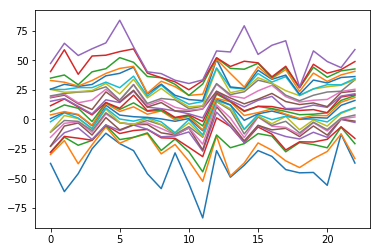

In [57]:
plt.plot(np.sort(z_all));

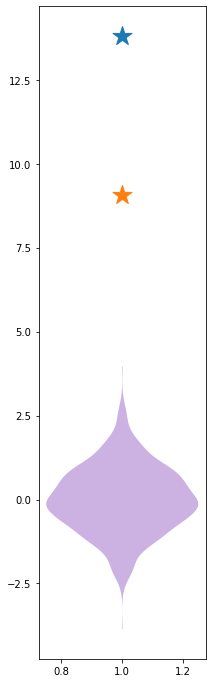

In [49]:
loo_subj = 12
loo_group_idx = np.arange(25)[np.arange(25)!=loo_subj]

reliability_perm = scores['reliability']['R'].squeeze() # 23,25,1001
all_true = reliability_perm[:,:,0]
loo_true = reliability_perm[:,loo_subj,0]
loo_group_true = reliability_perm[:,loo_group_idx,0]
null_ = reliability_perm.mean(0).mean(0)[1:]
null_mean = null_.mean()
null_std = null_.std()

z_all = (all_true - null_mean)/null_std
z_group = (z_all[:,loo_group_idx]).mean()
z_subj = z_all.mean(0)[loo_subj]
z_null_pop = (null_ - null_mean)/null_std

plt.figure(figsize=(3,12))
plt.scatter(1,z_subj,label='loo-subj',marker='*',s=400)
plt.scatter(1,z_all.mean(),label='N-1',marker='*',s=400)
viol = plt.violinplot(z_null_pop,showextrema=False)
for pc in viol['bodies']:
    pc.set_facecolor((84/255,2/255,163/255))  # Set the facecolor to red

# plt.legend()
plt.savefig(os.path.join('Figs','Fig2_Subj12_GroupAndSubjViolin_R2R' + '_{}.png'.format('1')),transparent=False,dpi=200) #dpi=500


# plt.scatter(1, loo_true.mean())
# plt.scatter(1, loo_group_true.mean())
# plt.violinplot(null_)


/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
findfont: Font family ['Helvetica Light'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica Light'] not found. Falling back to DejaVu Sans.


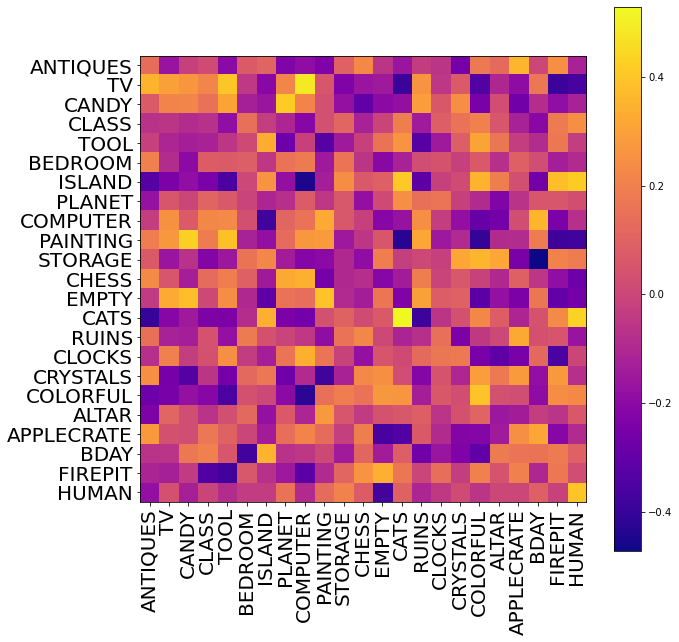

/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.


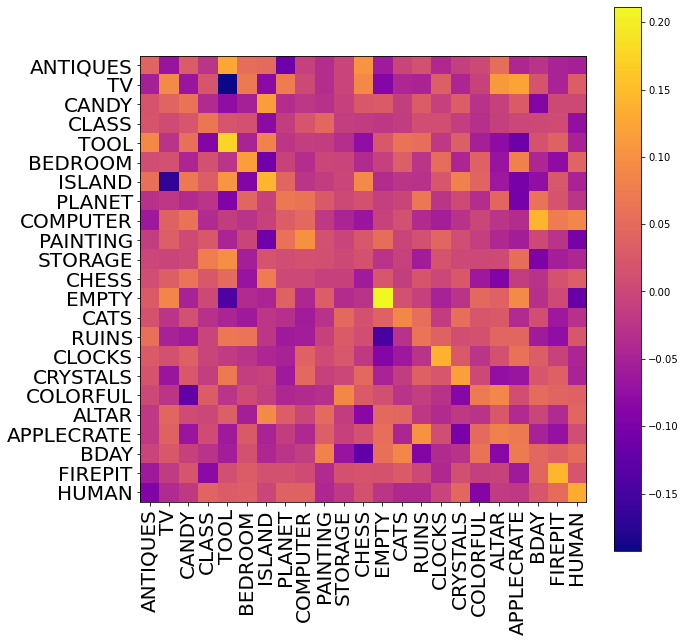

In [13]:
### set helvetica font for aesthetic figure labels
plt.rcParams["font.family"] = "Helvetica Light" # set default plot font to helvetica light
fontfam = {'fontname':'Helvetica Light'}

from matplotlib.colors import DivergingNorm



def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

# img = np.random.rand(4,10)
# plt.imshow(img, cmap='Reds')

# [highlight_cell(i,i, color="black", linewidth=3,alpha=0.6) for i in range(23)]
# others = np.arange(23)[np.arange(23)!=5]
# [highlight_cell(5,i, color="red", linewidth=2,alpha=1) for i in others]
# [highlight_cell(i,5, color="red", linewidth=2,alpha=1) for i in others]
# highlight_cell(5,5, color="limegreen", linewidth=2,alpha=1)

corrmat = scores['corrmat']['R'].squeeze() # 23,23,25

cmap = 'plasma'

plt.figure(figsize=(10,10))
plt.imshow(corrmat[:,:,loo_subj],cmap=cmap,norm=DivergingNorm(0))
plt.colorbar()
plt.xticks(range(23),[RoomObjectIdxToNames[i+1] for i in range(23)],rotation=90,fontsize=20,**fontfam);
plt.yticks(range(23),[RoomObjectIdxToNames[i+1] for i in range(23)],fontsize=20,**fontfam);
plt.savefig(os.path.join('Figs','Fig2_Subj12_Subj_R2R_magma' + '_{}.png'.format('transparent')),transparent=True,dpi=200) #dpi=500


plt.show()


plt.figure(figsize=(10,10))
plt.imshow(corrmat[:,:,loo_group_idx].mean(2),cmap=cmap,norm=DivergingNorm(0))
plt.colorbar()
plt.xticks(range(23),[RoomObjectIdxToNames[i+1] for i in range(23)],rotation=90,fontsize=20,**fontfam);
plt.yticks(range(23),[RoomObjectIdxToNames[i+1] for i in range(23)],fontsize=20,**fontfam);
# plt.savefig(os.path.join('Figs','Fig2_Subj12_Group_R2R' + '_{}.png'.format('transparent')),transparent=True,dpi=200) #dpi=500

plt.show()


findfont: Font family ['Helvetica Light'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica Light'] not found. Falling back to DejaVu Sans.


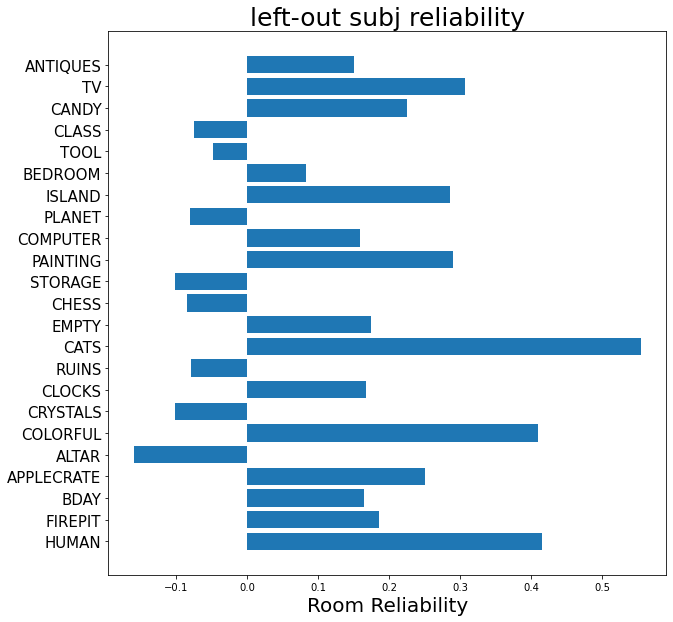

In [14]:
plt.figure(figsize=(10,10))
plt.barh(range(23),loo_true)
plt.yticks(range(23),[RoomObjectIdxToNames[i+1] for i in range(23)], fontsize=15);
plt.xlabel("Room Reliability", fontsize=20)
plt.title("left-out subj reliability", fontsize=25)
plt.gca().invert_yaxis();
plt.savefig(os.path.join('Figs','Fig2_Subj12_Subj_Reliability_barplot' + '_{}.png'.format('transparent')),transparent=True,dpi=200) #dpi=500


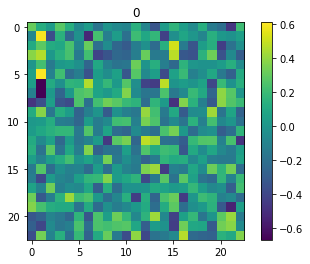

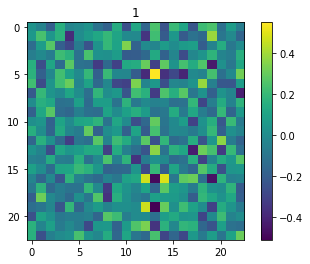

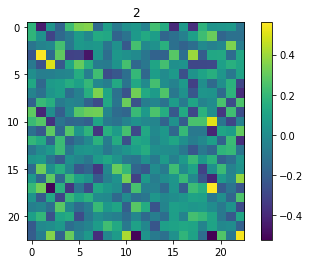

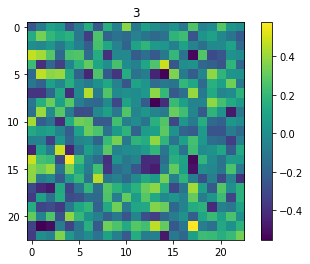

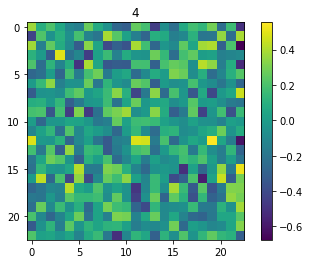

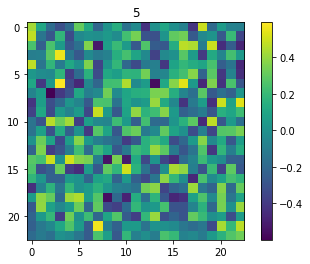

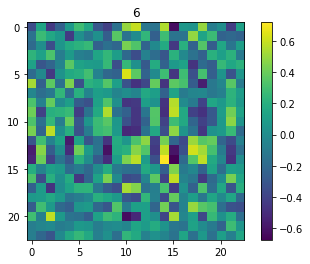

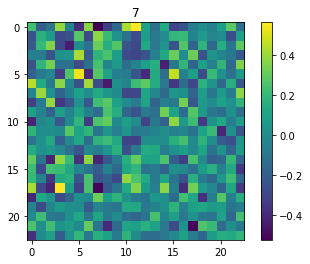

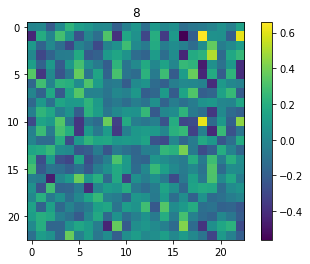

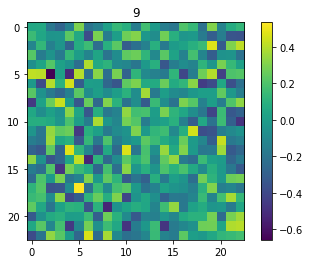

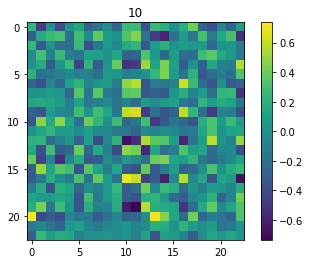

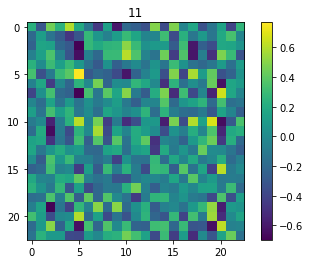

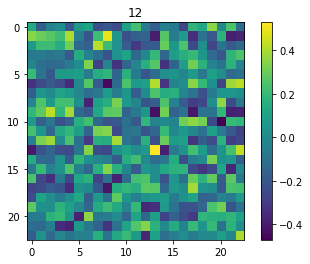

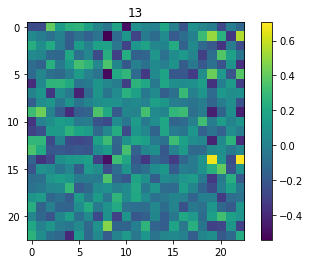

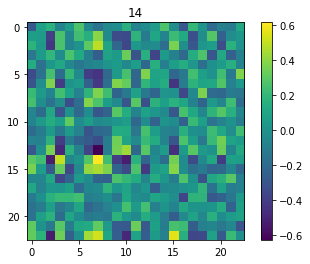

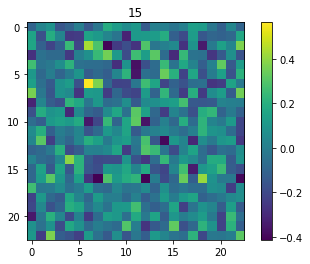

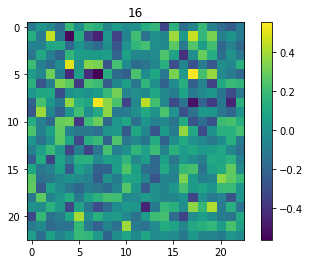

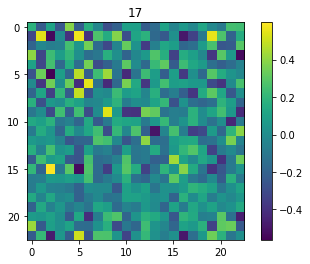

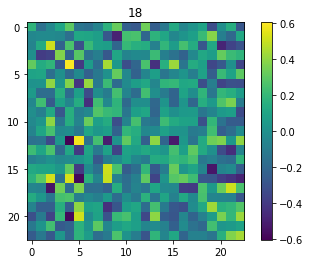

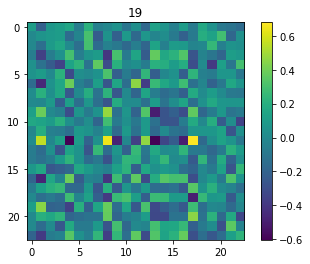

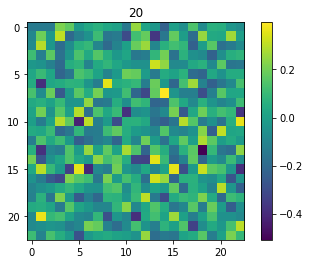

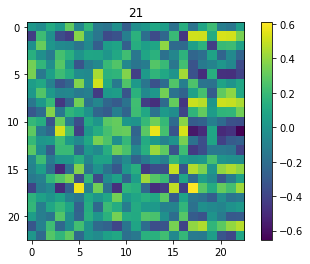

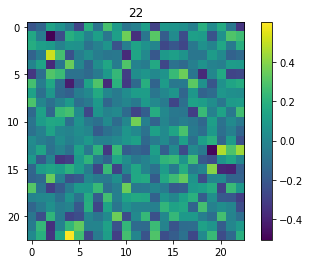

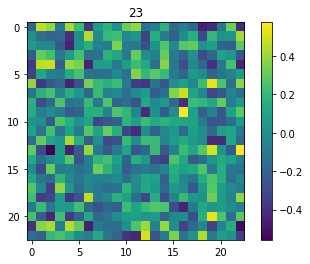

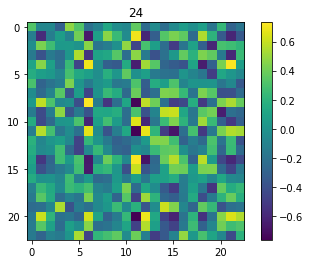

In [31]:
for s in range(25):
    cmat_good = scores['corrmat']['R'].squeeze()[:,:,s]
    plt.imshow(cmat_good)
    plt.colorbar(); plt.title(s);
    plt.show()

    